# MOUNT GOOGLE DRIVE


In [ ]:
## MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

## SAVE BIAR GA HARUS MOUNT ULANG
!cp -r /root/.config/Google /content/drive/MyDrive/colab_token_backup

In [ ]:
## JALANIN INI AJA KALO SUDAH SAVE ^
!cp -r /content/drive/MyDrive/colab_token_backup /root/.config/Google
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# SCRAPING DATA

In [ ]:
# # SCRAPE PLAY STORE
# !pip install google-play-scraper

# from google_play_scraper import Sort, reviews
# import pandas as pd
# from datetime import datetime
# import time

# app_id = 'in.startv.hotstar.dplus'

# # Target batas maksimal review per range tahun
# # MAX_2020_2022 = 1000
# # MAX_2023_2025 = 1000
# MAX_2020_2022 = 419 # DISAMAKAN
# MAX_2023_2025 = 419 # DISAMAKAN

# reviews_2020_2022 = []
# reviews_2023_2025 = []

# continuation_token = None
# count = 0

# while True:
#     result, continuation_token = reviews(
#         app_id,
#         lang='id',
#         country='id',
#         sort=Sort.NEWEST,
#         count=200,
#         continuation_token=continuation_token
#     )

#     for r in result:
#         review_year = r['at'].year

#         if 2020 <= review_year <= 2022:
#             if len(reviews_2020_2022) < MAX_2020_2022:
#                 reviews_2020_2022.append(r)

#         elif 2023 <= review_year <= 2025:
#             if len(reviews_2023_2025) < MAX_2023_2025:
#                 reviews_2023_2025.append(r)

#     print(f"Batch {count} — Total 2020-2022: {len(reviews_2020_2022)}, Total 2023-2025: {len(reviews_2023_2025)}")
#     count += 1
#     time.sleep(1)

#     # Berhenti kalau dua-duanya udah cukup atau review sudah terlalu lama
#     if len(reviews_2020_2022) >= MAX_2020_2022 and len(reviews_2023_2025) >= MAX_2023_2025:
#         break
#     if result and result[-1]['at'].year < 2020:
#         break

# # Simpan ke CSV
# pd.DataFrame(reviews_2020_2022).to_csv("playstore_reviews_2020_2022.csv", index=False)
# pd.DataFrame(reviews_2023_2025).to_csv("playstore_reviews_2023_2025.csv", index=False)

# COMBINE FILES

In [ ]:
# import pandas as pd

# # Define the paths to the input CSV files
# file_path_1 = '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/playstore_419reviews_2020_2022.csv'
# file_path_2 = '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/playstore_419reviews_2023_2025.csv'

# # Define the path for the output combined CSV file
# output_path = '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/combined_review_play.csv'

# # Read the CSV files into pandas DataFrames
# try:
#     df1 = pd.read_csv(file_path_1)
#     df2 = pd.read_csv(file_path_2)

#     # Combine the DataFrames
#     combined_df = pd.concat([df1, df2], ignore_index=True)

#     # Save the combined DataFrame to a new CSV file
#     combined_df.to_csv(output_path, index=False)

#     print(f"Files '{file_path_1}' and '{file_path_2}' combined and saved to '{output_path}'")
#     # Display the head of the combined DataFrame to verify
#     print("\nHead of the combined DataFrame:")
#     print(combined_df.head())
#     # display(combined_df.head())

# except FileNotFoundError as e:
#     print(f"Error: {e}. Make sure the input files exist in the specified directory.")
# except Exception as e:
#     print(f"An error occurred: {e}")

# TRANSLATE DATA

In [ ]:
## PROSES TRANSLATE
!pip install googletrans==3.1.0a0
from googletrans import Translator
import pandas as pd

# inisialisasi
translator = Translator()
translator.raise_Exception = True

# Baca file dari Drive
file_path = "/content/drive/My Drive/Tesis/SCRAPE SENTIMENT/combined_review_play.csv"
df = pd.read_csv(file_path)

# Fungsi untuk translate teks ke bahasa Indonesia
def translate_to_indonesian(text):
    try:
        translated = translator.translate(str(text), dest='id').text
        return translated
    except Exception as e:
        print(f"Error translating: {e}")
        return text

df['translated_content'] = df['content'].apply(translate_to_indonesian)
print(df[['content', 'translated_content']].head())
# display(df[['content', 'translated_content']].head

df.to_csv("/content/drive/My Drive/Tesis/SCRAPE SENTIMENT/combined_review_play_translated.csv", index=False)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=02e723910d4fcf4011e36ddfc06abf503b0300bda5679535a08597bd0f751c5c
  Stored in directory: /root/.cache/pip/wheels/96/ac/bd/9df9eab356c0576896e97147425987f6f45e9e46456c978d18
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperframe

In [6]:
## RUN COMBINED FILES (SUDAH DI TRANSLATE)
import pandas as pd

pd.set_option('display.max_colwidth', None)

#Path to the CSV file in Google Drive
csv_path = '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/combined_review_play_translated.csv'

#Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

#Display the first few rows of the DataFrame
print(df.head())
# display(df.head())

# Cek apakah ada data yang kosong
print(df.isnull().sum())

                                                                     content  \
0            Please fix the "WiFi bug" , i couldn't open the app on any wifi   
1              Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2  Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                      Hebat   
4                                                       Ga bisa" mutar video   

   score                   at  \
0      2  2022-12-31 20:28:17   
1      4  2022-12-31 18:09:19   
2      3  2022-12-31 15:23:16   
3      5  2022-12-31 12:50:14   
4      1  2022-12-31 11:58:09   

                                                              translated_content  
0  Tolong perbaiki "bug WiFi", saya tidak bisa membuka aplikasi di wifi mana pun  
1                  Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.  
2      Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             838 non-null    object
 1   score               838 non-null    int64 
 2   at                  838 non-null    object
 3   translated_content  838 non-null    object
dtypes: int64(1), object(3)
memory usage: 26.3+ KB


In [ ]:
# Menghitung jumlah kata di setiap ulasan
df['jumlah_kata_awal'] = df['content'].apply(lambda x: len(str(x).split()))

# Mendapatkan statistik deskriptif untuk kolom 'jumlah_kata'
# Hasilnya akan mencakup count, mean, std, min, max, dan quartile
statistik_teks = df['jumlah_kata_awal'].describe()


print("\nStatistik Panjang Ulasan:")
print(statistik_teks)


# Atau, untuk mendapatkan nilai spesifik:
rata_rata_kata = statistik_teks['mean']
min_kata = statistik_teks['min']
max_kata = statistik_teks['max']

print(f"\n- Rata-rata jumlah kata: {rata_rata_kata:.2f}")
print(f"- Minimum jumlah kata: {min_kata}")
print(f"- Maksimum jumlah kata: {max_kata}")


Statistik Panjang Ulasan:
count    838.00000
mean      14.01074
std       13.84782
min        1.00000
25%        4.00000
50%       10.00000
75%       19.00000
max       83.00000
Name: jumlah_kata_awal, dtype: float64

- Rata-rata jumlah kata: 14.01
- Minimum jumlah kata: 1.0
- Maksimum jumlah kata: 83.0


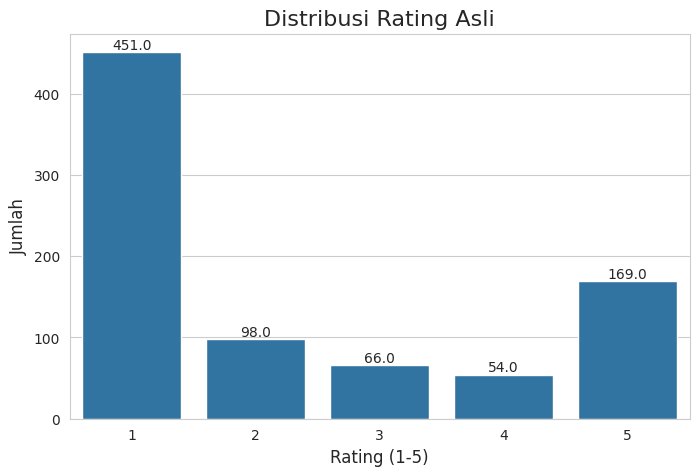

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set_style('whitegrid')

# --- Plot 1: Distribusi Rating Asli ---
plt.figure(figsize=(8, 5))
ax_rating = sns.countplot(x='score', data=df, order=sorted(df['score'].unique()))
plt.title('Distribusi Rating Asli', fontsize=16)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambah label jumlah
for p in ax_rating.patches:
    ax_rating.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
## CLEANING
pd.set_option('display.max_colwidth', None)

import string
import re

def clean_text(text):
    # 1. Case Folding: Mengubah semua teks menjadi huruf kecil
    text = text.lower()

    # 2. Menghapus URL/Link (Pembersihan Ekstra)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Menghapus Tanda Baca: Menghapus semua yang ada di string.punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Menghapus Angka
    text = re.sub(r'\d+', '', text)

    # 5. Menghapus Spasi Berlebihan
    text = re.sub(r'\s+', ' ', text).strip()

    # Menghapus ulasan yang mungkin menjadi kosong setelah dibersihkan
    if text == '':
        text = None

    return text

df['cleaned_content'] = df['translated_content'].apply(clean_text)

print(df[['content','translated_content', 'cleaned_content']].head())
# display(df[['content', 'translated_content', 'cleaned_content']].head())

df.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/cleaned_review_play.csv', index=False)
print('\nHasil Cleaning sudah disimpan sebagai cleaned_review_play.csv')

                                                                     content  \
0            Please fix the "WiFi bug" , i couldn't open the app on any wifi   
1              Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2  Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                      Hebat   
4                                                       Ga bisa" mutar video   

                                                              translated_content  \
0  Tolong perbaiki "bug WiFi", saya tidak bisa membuka aplikasi di wifi mana pun   
1                  Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2      Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                          Hebat   
4                                                           Ga bisa" mutar video   

              

In [ ]:
df.isnull().sum()

,0
content,0
score,0
at,0
translated_content,0
jumlah_kata_awal,0
cleaned_content,0


In [ ]:
## TOKENIZATION
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['tokenized_content'] = df['cleaned_content'].apply(word_tokenize)
print(df[['content','translated_content','cleaned_content', 'tokenized_content']].head())
# display(df[['cleaned_content']])

# 1. Menghitung panjang (jumlah token) di setiap list
# Kita akan buat kolom baru yang berisi jumlah token per baris/dokumen.
df['initial_token_count'] = df['tokenized_content'].str.len()

# 2. Menjumlahkan semua hitungan token
# Hitung total dari kolom 'initial_token_count'
total_token_awal = df['initial_token_count'].sum()

print("Jumlah Token di Setiap Dokumen (Baris) Setelah Tokenization:")
print(df['initial_token_count'].head())

print("\nJumlah Total Token Keseluruhan (Sebelum Stopword Removal):")
print(total_token_awal)

df.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/tokenized_review_play.csv', index=False)
print('\nHasil Tokenization sudah disimpan sebagai tokenized_review_play.csv')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                                     content  \
0            Please fix the "WiFi bug" , i couldn't open the app on any wifi   
1              Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2  Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                      Hebat   
4                                                       Ga bisa" mutar video   

                                                              translated_content  \
0  Tolong perbaiki "bug WiFi", saya tidak bisa membuka aplikasi di wifi mana pun   
1                  Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2      Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                          Hebat   
4                                                           Ga bisa" mutar video   

              

In [ ]:
df.isnull().sum()

,0
content,0
score,0
at,0
translated_content,0
jumlah_kata_awal,0
cleaned_content,0
tokenized_content,0
initial_token_count,0


In [ ]:
# STOPWORD REMOVAL
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Define Indonesian Stopwords
stopwords_id = set(stopwords.words('indonesian'))

# Tambah stopword yang sering lolos
custom_stopwords = {
    'ga', 'aplikasi', 'disney', 'nya', 'gak', 'aja', 'tolong', 'udah', 'banget', 'yg', 'ya', 'udh', 'bagus', 'jelek', 'pas'
}

# Gabungkan
stopwords_id.update(custom_stopwords)

def remove_stopwords(token):
  return[token for token in token if token not in stopwords_id]

df['stopword_removed_content'] = df['tokenized_content'].apply(remove_stopwords)

print(df[['cleaned_content','tokenized_content', 'stopword_removed_content']].head())
# display(df[['cleaned_content',tokenized_content', 'stopword_removed_content']].head())

# 1. Menghitung panjang (jumlah token) di setiap baris
# Metode .str.len() di Pandas akan menghitung panjang list di setiap sel.
df['token_count'] = df['stopword_removed_content'].str.len()

# 2. Menjumlahkan semua hitungan token dari semua baris
total_token_setelah_stopword = df['token_count'].sum()

print("Jumlah Token di Setiap Dokumen (Baris):")
print(df['token_count'].head())

print("\nJumlah Total Token Keseluruhan (Setelah Stopword Removal):")
print(total_token_setelah_stopword)

df.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/stopword_removed_review_play.csv', index=False)
print('Hasil Stopword Removal sudah disimpan sebagai stopword_removed_review_play.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                              cleaned_content  \
0  tolong perbaiki bug wifi saya tidak bisa membuka aplikasi di wifi mana pun   
1                 lumayanlah alternatif hiburan gratis otomatis krn pake halo   
2     rada kesel pengen nonton udah coba buat bayar yg perbulan tapi gak bisa   
3                                                                       hebat   
4                                                         ga bisa mutar video   

                                                                          tokenized_content  \
0  [tolong, perbaiki, bug, wifi, saya, tidak, bisa, membuka, aplikasi, di, wifi, mana, pun]   
1                      [lumayanlah, alternatif, hiburan, gratis, otomatis, krn, pake, halo]   
2     [rada, kesel, pengen, nonton, udah, coba, buat, bayar, yg, perbulan, tapi, gak, bisa]   
3                                                                                   [hebat]   
4                                     

In [ ]:
from collections import Counter

before = Counter([word for tokens in df['tokenized_content'] for word in tokens])
after = Counter([word for tokens in df['stopword_removed_content'] for word in tokens])

print("Kata paling sering sebelum:", before.most_common(10))
print("Kata paling sering sesudah:", after.most_common(10))

Kata paling sering sebelum: [('bisa', 292), ('di', 267), ('saya', 190), ('tidak', 166), ('ada', 165), ('aplikasi', 163), ('nya', 149), ('ini', 141), ('dan', 130), ('gak', 123)]
Kata paling sering sesudah: [('film', 120), ('nonton', 113), ('berlangganan', 95), ('langganan', 84), ('login', 63), ('bayar', 61), ('download', 56), ('tv', 44), ('hp', 43), ('apk', 41)]


In [ ]:
df.isnull().sum()

,0
content,0
score,0
at,0
translated_content,0
jumlah_kata_awal,0
cleaned_content,0
tokenized_content,0
initial_token_count,0
stopword_removed_content,0
token_count,0


In [ ]:
# STEMMING
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(tokens):
  return [stemmer.stem(token) for token in tokens]

df['stemmed_content'] = df['stopword_removed_content'].apply(stem_text)
print(df[['stopword_removed_content', 'stemmed_content']].head())
# display(df[['stopword_removed_content','stemmed_content']].head())

# 1. Menghitung panjang (jumlah token) di setiap baris
# Metode .str.len() di Pandas akan menghitung panjang list di setiap sel.
df['token_count'] = df['stemmed_content'].str.len()

# 2. Menjumlahkan semua hitungan token dari semua baris
total_token_setelah_stemming = df['token_count'].sum()

print("Jumlah Token di Setiap Dokumen (Baris):")
print(df['token_count'].head())

print("\nJumlah Total Token Keseluruhan (Setelah Stemming):")
print(total_token_setelah_stemming)

df.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/stemming_review_play.csv', index=False)
print('\nHasil Stemming sudah disimpan sebagai stemming_review_play.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00
                                               stopword_removed_content  \
0                                  [perbaiki, bug, wifi, membuka, wifi]   
1  [lumayanlah, alternatif, hiburan, gratis, otomatis, krn, pake, halo]   
2                  [rada, kesel, pengen, nonton, coba, bayar, perbulan]   
3                                                               [hebat]   
4                                                        [mutar, video]   

                                                   stemmed_content  
0                                    [baik, bug, wifi, buka, wifi]  
1  [lumayan, alternatif, hibur, gratis, otomatis, krn, pake, halo]  
2                   [rada, kesel, ken, nonton, coba, bayar, bulan]  
3                                                          [hebat]  
4                                                   [mutar, video]  
Jumlah Token di Setiap Dokumen (Baris):
0    5
1    8
2

In [ ]:
df.isnull().sum()

,0
content,0
score,0
at,0
translated_content,0
jumlah_kata_awal,0
cleaned_content,0
tokenized_content,0
initial_token_count,0
stopword_removed_content,0
token_count,0


# Simpan Progress Preprocessing

In [ ]:
# SIMPAN PROGRESS
df.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/progres_preprocessing_play.csv', index=False)

print('Progress Preprocessing berhasil disimpan sebagai progres_preprocessing_play.csv')

# df.to_pickle('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/progres_preprocessing_play.pkl')

Progress Preprocessing berhasil disimpan sebagai progres_preprocessing_play.csv


In [ ]:
# LOAD KEMBALI TANPA HARUS STEMMING ULANG

# # Load the DataFrame from the pickle file
# df = pd.read_pickle('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/progres_preprocessing_play.pkl')

df = pd.read_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/progres_preprocessing_play.csv')

# Tampilkan hasil
print(df[['stopword_removed_content', 'stemmed_content']].head())
# display(df[['stopword_removed_content', 'stemmed_content']].head()

                                                               stopword_removed_content  \
0                                        ['perbaiki', 'bug', 'wifi', 'membuka', 'wifi']   
1  ['lumayanlah', 'alternatif', 'hiburan', 'gratis', 'otomatis', 'krn', 'pake', 'halo']   
2                    ['rada', 'kesel', 'pengen', 'nonton', 'coba', 'bayar', 'perbulan']   
3                                                                             ['hebat']   
4                                                                    ['mutar', 'video']   

                                                                   stemmed_content  
0                                          ['baik', 'bug', 'wifi', 'buka', 'wifi']  
1  ['lumayan', 'alternatif', 'hibur', 'gratis', 'otomatis', 'krn', 'pake', 'halo']  
2                     ['rada', 'kesel', 'ken', 'nonton', 'coba', 'bayar', 'bulan']  
3                                                                        ['hebat']  
4                           

# Lexicon

In [ ]:
# LOAD KAMUS LEXICON

# Path ke folder lexicon
path_lexicon = '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/InSet-master'

# Path ke kamus positif dan negatif
path_positif = f'{path_lexicon}/positive.tsv'
path_negatif = f'{path_lexicon}/negative.tsv'

# Baca Positive.tsv ke DataFrame Pandas
df_positif = pd.read_csv(path_positif, sep='\t', header=None, names=['kata', 'nilai'])

# Baca Negative.tsv ke DataFrame Pandas
df_negatif = pd.read_csv(path_negatif, sep='\t', header=None, names=['kata', 'nilai'])

# Tampilkan baris awal untuk kedua DataFrame
print("Lexicon Positif:")
print(df_positif.head())
#display(df_positive_lexicon.head())

print("\nLexicon Negatif:")
print(df_negatif.head())
#display(df_negative_lexicon.head())

Lexicon Positif:
        kata   nilai
0       word  weight
1        hai       3
2    merekam       2
3  ekstensif       3
4  paripurna       1

Lexicon Negatif:
                   kata   nilai
0                  word  weight
1    putus tali gantung      -2
2               gelebah      -2
3            gobar hati      -2
4  tersentuh (perasaan)      -1


In [ ]:
# Pembuatan Kamus Lexicon

# Baca TSV ke dalam DataFrame Pandas, tanpa membaca Header Row
df_positif = pd.read_csv(path_positif, sep='\t', header=None, names=['kata', 'nilai'], skiprows=1)
df_negatif = pd.read_csv(path_negatif, sep='\t', header=None, names=['kata', 'nilai'], skiprows=1)

# Gabung kedua leksikon menjadi satu kamus dan mengubah type score menjadi int
kamus_lexicon = dict(zip(df_positif['kata'], df_positif['nilai'].astype(int)))
kamus_lexicon.update(dict(zip(df_negatif['kata'], df_negatif['nilai'].astype(int))))

In [ ]:
# Kalkulasi Skor Lexicon

def kalkulasi_skor_lexicon(tokens, lexicon):
  nilai = 0
  for token in tokens:
    if token in lexicon:
      nilai += lexicon[token]
  return nilai

# Gabung stemmed_content ke ulasan_bersih
import ast
# Jika ternyata 'stemmed_content' berbentuk string list, ubah jadi list dulu
df['stemmed_content'] = df['stemmed_content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['ulasan_bersih'] = df['stemmed_content'].apply(lambda x:' '.join(x))
# print(df[['stemmed_content', 'ulasan_bersih']].head())

# Apply fungsi untuk membuat kolom baru 'skor_lexicon'
df['skor_lexicon'] = df['stemmed_content'].apply(lambda x: kalkulasi_skor_lexicon(x, kamus_lexicon))

# Tampilkan hasil
print(df[['ulasan_bersih', 'skor_lexicon']].head())
#display(df[['ulasan_bersih','skor_lexicon']].head())

                                            ulasan_bersih  skor_lexicon
0                                 baik bug wifi buka wifi            -4
1  lumayan alternatif hibur gratis otomatis krn pake halo             6
2                  rada kesel ken nonton coba bayar bulan           -12
3                                                   hebat             0
4                                             mutar video             0


In [ ]:
df.isnull().sum()

,0
content,0
score,0
at,0
translated_content,0
jumlah_kata_awal,0
cleaned_content,0
tokenized_content,0
initial_token_count,0
stopword_removed_content,0
token_count,0


# Konversi Skor Lexicon ke Rating

In [ ]:
# Menyamakan Range Nilai Lexicon ke Rating (-5 sampai +5 ke 1-5)

def penyamaan_lexicon_ke_score(skor_lexicon):
    # Clamp skor_lexicon agar tetap di dalam rentang -5 sampai 5
    skor_lexicon = max(min(skor_lexicon, 5), -5)

    # Range awal Lexicon
    min_lexicon = -5
    max_lexicon = 5
    # Range target mengikuti score (1-5)
    min_score = 1
    max_score = 5

    # Linear Scaling
    penyamaan_skor = min_score + (skor_lexicon - min_lexicon) * (max_score - min_score) / (max_lexicon - min_lexicon)
    return round(penyamaan_skor)

# Apply fungsi untuk membuat kolom baru 'skor_lexicon_ke_score'
df['skor_lexicon_ke_score'] = df['skor_lexicon'].apply(penyamaan_lexicon_ke_score)

# Tampilkan head DataFrame dengan kolom baru untuk melihat hasil
print(df[['ulasan_bersih','skor_lexicon', 'skor_lexicon_ke_score']].head())
#display(df[['ulasan_bersih','skor_lexicon', 'skor_lexicon_ke_score']].head())

                                            ulasan_bersih  skor_lexicon  \
0                                 baik bug wifi buka wifi            -4   
1  lumayan alternatif hibur gratis otomatis krn pake halo             6   
2                  rada kesel ken nonton coba bayar bulan           -12   
3                                                   hebat             0   
4                                             mutar video             0   

   skor_lexicon_ke_score  
0                      1  
1                      5  
2                      1  
3                      3  
4                      3  


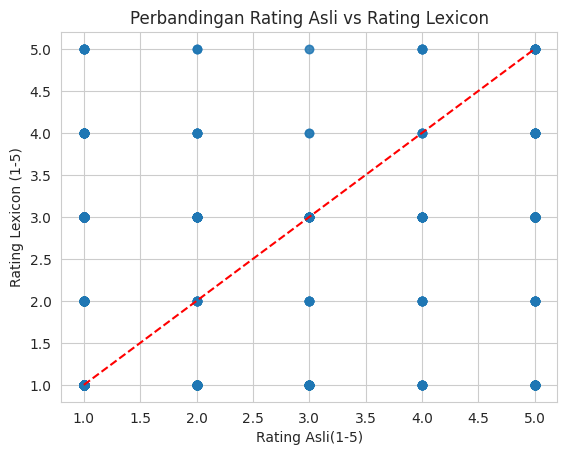

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['score'], df['skor_lexicon_ke_score'], alpha=0.6)
plt.plot([1,5],[1,5], color='red', linestyle='--')
plt.xlabel('Rating Asli(1-5)')
plt.ylabel('Rating Lexicon (1-5)')
plt.title('Perbandingan Rating Asli vs Rating Lexicon')
plt.show()

In [ ]:
import numpy as np
mae = np.mean(np.abs(df['skor_lexicon_ke_score'] - df['score']))
rmse = np.sqrt(np.mean((df['skor_lexicon_ke_score'] - df['score'])**2))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 1.272076372315036
RMSE: 1.73549219941328


In [ ]:
from scipy.stats import pearsonr, spearmanr
pearson_corr, _ = pearsonr(df['score'], df['skor_lexicon_ke_score'])
spearman_corr, _ = spearmanr(df['score'], df['skor_lexicon_ke_score'])
print(f"Pearson Correlation: {pearson_corr:.3f}, Spearman Correlation: {spearman_corr:.3f}")

Pearson Correlation: 0.278, Spearman Correlation: 0.254


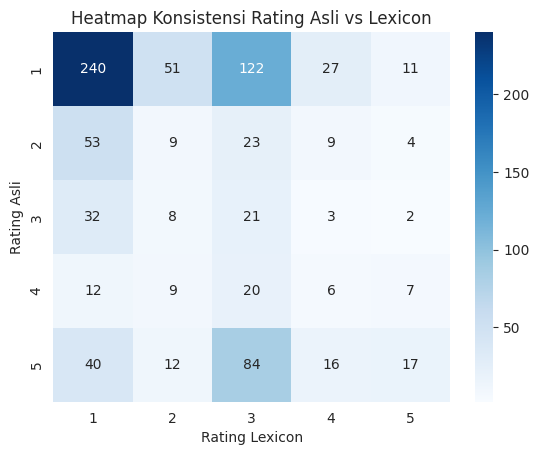

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply

# Crosstab: menghitung kombinasi tiap nilai rating
ct = pd.crosstab(df['score'], df['skor_lexicon_ke_score'])

# Visualisasi heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rating Lexicon')
plt.ylabel('Rating Asli')
plt.title('Heatmap Konsistensi Rating Asli vs Lexicon')
plt.show()

In [ ]:
# Kategorisasi Sentimen (Multiclass)
def kategorisasi_sentimen_multiclass(skor):
    if skor <= 2:
        return 'Negatif'
    elif skor == 3:
        return 'Netral'
    else:  # skor >= 4
        return 'Positif'

# Apply fungsi dan buat kolom baru 'sentimen_multiclass'
df['sentimen_multiclass'] = df['skor_lexicon_ke_score'].apply(kategorisasi_sentimen_multiclass)

# Tampilkan head DataFrame untuk cek hasil
print(df[['skor_lexicon_ke_score', 'sentimen_multiclass']].head())
#display(df[['skor_lexicon_ke_score','sentimen_multiclass']].head())

df.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/lex_labeled_review_play.csv', index=False)
print('\nHasil Pelabelan Lexicon sudah disimpan sebagai lex_labeled_review_play.csv')

   skor_lexicon_ke_score sentimen_multiclass
0                      1             Negatif
1                      5             Positif
2                      1             Negatif
3                      3              Netral
4                      3              Netral

Hasil Pelabelan Lexicon sudah disimpan sebagai lex_labeled_review_play.csv


In [7]:
#Back to Checkpoint

# Baca kembali file CSV
df = pd.read_csv("/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/lex_labeled_review_play.csv")

# Tampilkan beberapa baris awal untuk cek isi
print(df.head())
#display(df.head())

                                                                     content  \
0            Please fix the "WiFi bug" , i couldn't open the app on any wifi   
1              Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2  Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                      Hebat   
4                                                       Ga bisa" mutar video   

   score                   at  \
0      2  2022-12-31 20:28:17   
1      4  2022-12-31 18:09:19   
2      3  2022-12-31 15:23:16   
3      5  2022-12-31 12:50:14   
4      1  2022-12-31 11:58:09   

                                                              translated_content  \
0  Tolong perbaiki "bug WiFi", saya tidak bisa membuka aplikasi di wifi mana pun   
1                  Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2      Rada kesel pengen nonton, udah coba buat bayar yg perbulan ta

In [ ]:
# Check the number of non-empty strings in 'ulasan_bersih'
non_empty_ulasan = df[df['ulasan_bersih'].str.strip() != ''].shape[0]
print(f"Number of non-empty strings in 'ulasan_bersih': {non_empty_ulasan}")

# Check the number of non-null values in 'ulasan_bersih'
non_null_ulasan = df['ulasan_bersih'].count()
print(f"Number of non-null values in 'ulasan_bersih': {non_null_ulasan}")

# Check for any NaN values explicitly
nan_ulasan = df['ulasan_bersih'].isnull().sum()
print(f"Number of NaN values in 'ulasan_bersih': {nan_ulasan}")

Number of non-empty strings in 'ulasan_bersih': 836
Number of non-null values in 'ulasan_bersih': 797
Number of NaN values in 'ulasan_bersih': 41


In [ ]:
import ast

# Ensure 'stemmed_text' is a list, handling potential string representation from CSV
df['stemmed_content'] = df['stemmed_content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Recreate 'ulasan_bersih' from 'stemmed_content', ensuring empty lists become empty strings
df['ulasan_bersih'] = df['stemmed_content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Verify the number of non-null and non-empty strings in the regenerated column
print("\n--- Checks after regenerating 'ulasan_bersih' ---")
print(f"Number of non-null values in 'ulasan_bersih': {df['ulasan_bersih'].count()}")
print(f"Number of NaN values in 'ulasan_bersih': {df['ulasan_bersih'].isnull().sum()}")
print(f"Number of empty strings ('') in 'ulasan_bersih': {df[df['ulasan_bersih'] == ''].shape[0]}")
print("-------------------------------------------------\n")


--- Checks after regenerating 'ulasan_bersih' ---
Number of non-null values in 'ulasan_bersih': 838
Number of NaN values in 'ulasan_bersih': 0
Number of empty strings ('') in 'ulasan_bersih': 41
-------------------------------------------------



In [ ]:
# Check 'ulasan_bersih' immediately after loading
print("\n--- Checks immediately after loading CSV ---")
print(f"Number of non-null values in 'ulasan_bersih': {df['ulasan_bersih'].count()}")
print(f"Number of NaN values in 'ulasan_bersih': {df['ulasan_bersih'].isnull().sum()}")
print(f"Number of empty strings ('') in 'ulasan_bersih': {df[df['ulasan_bersih'] == ''].shape[0]}")
print("------------------------------------------\n")


--- Checks immediately after loading CSV ---
Number of non-null values in 'ulasan_bersih': 838
Number of NaN values in 'ulasan_bersih': 0
Number of empty strings ('') in 'ulasan_bersih': 838
------------------------------------------



In [ ]:
df.isnull().sum()
df.count()

,0
content,838
score,838
at,838
translated_content,838
jumlah_kata_awal,838
cleaned_content,838
tokenized_content,838
initial_token_count,838
stopword_removed_content,838
token_count,838


In [ ]:
# Menghitung jumlah kata di setiap ulasan
df['jumlah_kata'] = df['ulasan_bersih'].apply(lambda x: len(str(x).split()))

# Mendapatkan statistik deskriptif untuk kolom 'jumlah_kata'
# Hasilnya akan mencakup count, mean, std, min, max, dan quartile
statistik_teks = df['jumlah_kata'].describe()

print("\nStatistik Panjang Ulasan:")
print(statistik_teks)

# Atau, untuk mendapatkan nilai spesifik:
rata_rata_kata = statistik_teks['mean']
min_kata = statistik_teks['min']
max_kata = statistik_teks['max']

print(f"\n- Rata-rata jumlah kata: {rata_rata_kata:.2f}")
print(f"- Minimum jumlah kata: {min_kata}")
print(f"- Maksimum jumlah kata: {max_kata}")


Statistik Panjang Ulasan:
count    838.000000
mean       7.050119
std        7.025121
min        0.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       51.000000
Name: jumlah_kata, dtype: float64

- Rata-rata jumlah kata: 7.05
- Minimum jumlah kata: 0.0
- Maksimum jumlah kata: 51.0


In [ ]:
# Cek Inkonsistensi
# Definisikan threshold selisih
threshold = 3

# pastikan 'ulasan_bersih' dan skor_lexicon_ke_score' ada

# Fungsi bantu untuk dapatkan skor per kata
import ast
# Recreate 'ulasan_bersih' column as it might not be saved in the CSV or pickle
# Ensure 'stemmed_content' is a list, handling potential string representation
df['stemmed_content'] = df['stemmed_content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Convert list of tokens to a string, handling potential non-list entries
df['ulasan_bersih'] = df['stemmed_content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

def get_lexicon_scores(text):
    if isinstance(text, str): # Check if the input is a string
        words = text.split()
        return [kamus_lexicon.get(word, 0) for word in words]  # 0 jika kata tidak ada di kamus
    else:
        return [] # Return an empty list if input is not a string

# Tambahkan kolom skor_per_kata
df['skor_per_kata'] = df['ulasan_bersih'].apply(get_lexicon_scores)


# Ambil hanya ulasan dengan perbedaan besar antara rating dan skor_lexicon_ke_rating
df_inkonsisten_jelas = df[abs(df['score'] - df['skor_lexicon_ke_score']) >= threshold]

# Tampilkan 10 contoh ulasan yang perbedaannya besar
print("\nMenampilkan 10 ulasan dengan perbedaan signifikan antara score dan skor_lexicon_ke_score:\n")

for index, row in df_inkonsisten_jelas.head(10).iterrows():
    review_content = row['translated_content']
    score = row['score']
    lexicon_score_scaled = row['skor_lexicon_ke_score'] # Use the scaled lexicon score
    skor_per_kata = row['skor_per_kata']
    sentimen_multi = row['sentimen_multiclass']

    # Use ulasan_bersih for splitting to match skor_per_kata
    words = row['ulasan_bersih'].split()

    print(f"\n--- Index Ulasan: {index} ---")
    print(f"Teks Ulasan       : {review_content}")
    print(f"Rating Asli       : {score}")
    print(f"Rating Lexicon (1-5): {lexicon_score_scaled}") # Update label
    print(f"Sentimen Multiclass: {sentimen_multi}")
    print("Skor tiap kata dalam ulasan:")

    found = False
    # Ensure zipping with the correct list of scores
    for word, score in zip(words, skor_per_kata):
        if score != 0:
            print(f"  - Kata: '{word}', Skor Lexicon: {score}")
            found = True

    if not found:
        print("  - Tidak ada kata dalam ulasan yang cocok dengan kamus lexicon.")


Menampilkan 10 ulasan dengan perbedaan signifikan antara score dan skor_lexicon_ke_score:


--- Index Ulasan: 8 ---
Teks Ulasan       : GK ada yg gratisan gak papa harus nonton iklan yg penting bisa nonton
Rating Asli       : 1
Rating Lexicon (1-5): 5
Sentimen Multiclass: Positif
Skor tiap kata dalam ulasan:
  - Kata: 'gratis', Skor Lexicon: 4

--- Index Ulasan: 21 ---
Teks Ulasan       : saya sudah beli paket Disney hostar di my telkomsel tetapi pas login, akun nya belum berlangganan, gmana nih, apakah sudah tidak bekerja sama lagi?
Rating Asli       : 1
Rating Lexicon (1-5): 4
Sentimen Multiclass: Positif
Skor tiap kata dalam ulasan:
  - Kata: 'beli', Skor Lexicon: -3
  - Kata: 'paket', Skor Lexicon: 4
  - Kata: 'langgan', Skor Lexicon: 2

--- Index Ulasan: 26 ---
Teks Ulasan       : Maaf ini masalah hp saya ato gimana, setiap mau nonton yg muncul cuma black screen ama subtitle gak ada visualnya. Mohon segera di fiks.
Rating Asli       : 5
Rating Lexicon (1-5): 1
Sentimen Multiclass

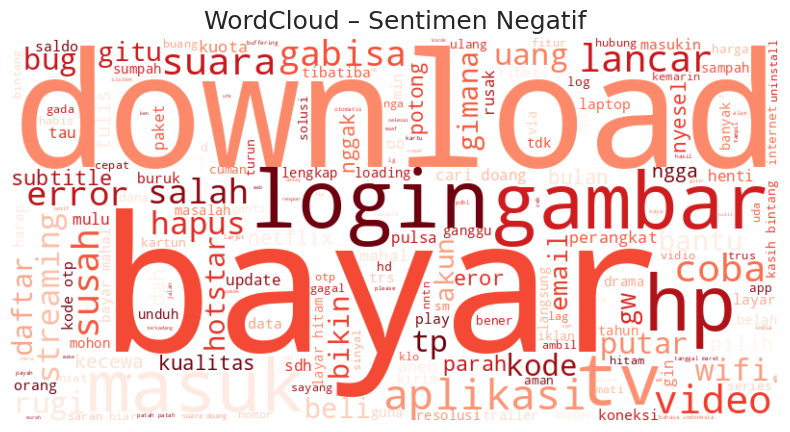

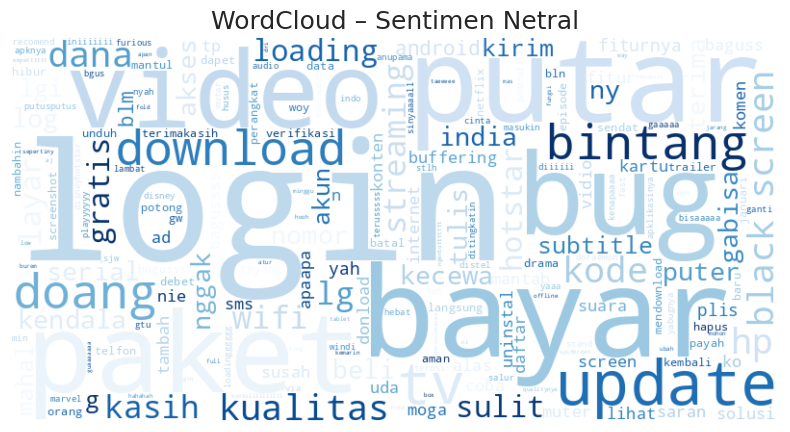

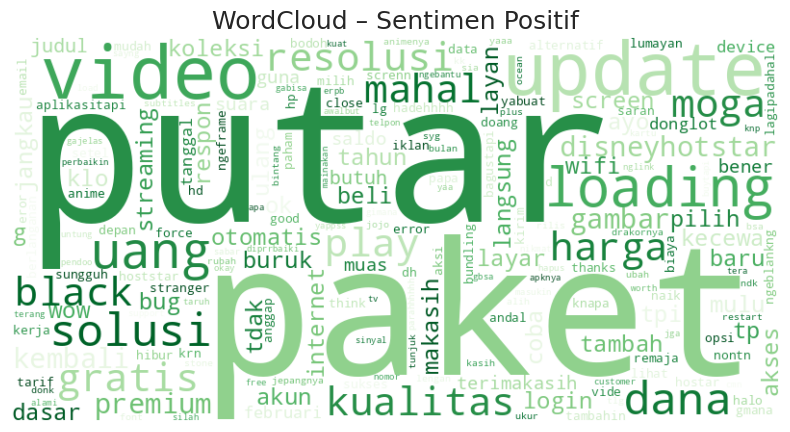

In [ ]:
# Visualisasi Wordcloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'nya', 'yg', 'ga', 'gak', 'aja', 'kok', 'deh', 'nih', 'dong',
    'banget', 'bgt', 'udah', 'nyaa', 'kayak', 'lah', 'buat', 'gk', 'tetep', 'telkomsel', 'mantap', 'baik', 'sih', 'kali', 'bagus', 'kadang', 'pake', 'film', 'langgan', 'tonton', 'nonton', 'nan', 'pas', 'oke', 'suruh', 'apk', 'mending', 'kalo', 'suka', 'buka', 'muncul', 'jaring', 'pakai', 'keren', 'tarik'
    ])

# Fungsi bantu untuk membuat WordCloud dan mengembalikannya
def generate_wordcloud(text, title, color='black'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color, stopwords=custom_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()
    return wordcloud # Return the wordcloud object

# Visualisasi WordCloud dan simpan ke file
output_dir = '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT'

negatif_content = ' '.join(df[df['sentimen_multiclass'] == 'Negatif']['ulasan_bersih'].astype(str))
netral_content  = ' '.join(df[df['sentimen_multiclass'] == 'Netral']['ulasan_bersih'].astype(str))
positif_content = ' '.join(df[df['sentimen_multiclass'] == 'Positif']['ulasan_bersih'].astype(str))

# WordCloud Negatif
wordcloud_negatif = generate_wordcloud(
    negatif_content, 'WordCloud – Sentimen Negatif', color='Reds'
)
wordcloud_negatif.to_file(f"{output_dir}/wordcloud_negatif_play.png")

# WordCloud Netral
wordcloud_netral = generate_wordcloud(
    netral_content, 'WordCloud – Sentimen Netral', color='Blues'
)
wordcloud_netral.to_file(f"{output_dir}/wordcloud_netral_play.png")

# WordCloud Positif
wordcloud_positif = generate_wordcloud(
    positif_content, 'WordCloud – Sentimen Positif', color='Greens'
)
wordcloud_positif.to_file(f"{output_dir}/wordcloud_positif_play.png")

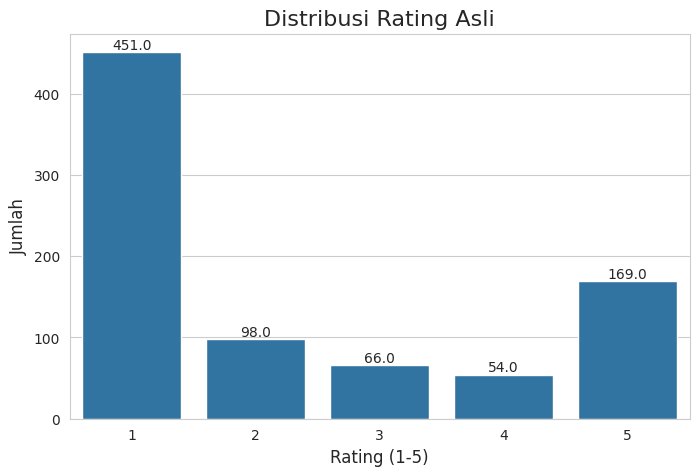

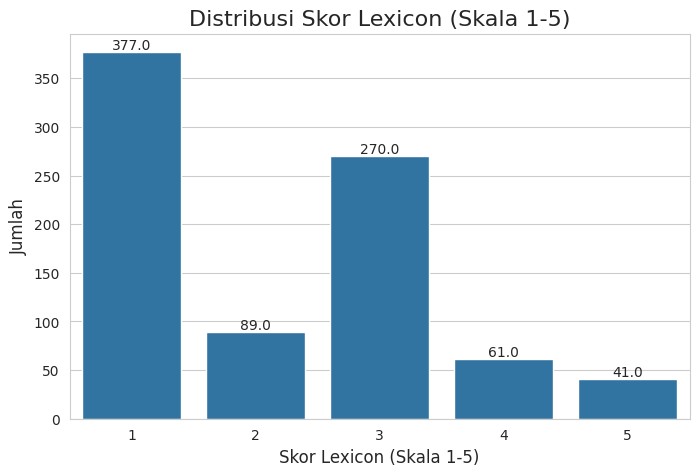

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set_style('whitegrid')

# --- Plot 1: Distribusi Rating Asli ---
plt.figure(figsize=(8, 5))
ax_rating = sns.countplot(x='score', data=df, order=sorted(df['score'].unique()))
plt.title('Distribusi Rating Asli', fontsize=16)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambah label jumlah
for p in ax_rating.patches:
    ax_rating.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


# --- Plot 2: Distribusi Skor Lexicon ---
plt.figure(figsize=(8, 5))
# 2. Gunakan kolom yang sudah dibulatkan
ax_lexicon = sns.countplot(
    x='skor_lexicon_ke_score',
    data=df,
    order=sorted(df['skor_lexicon_ke_score'].unique())
)
plt.title('Distribusi Skor Lexicon (Skala 1-5)', fontsize=16)
plt.xlabel('Skor Lexicon (Skala 1-5)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambah label jumlah
for p in ax_lexicon.patches:
    ax_lexicon.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

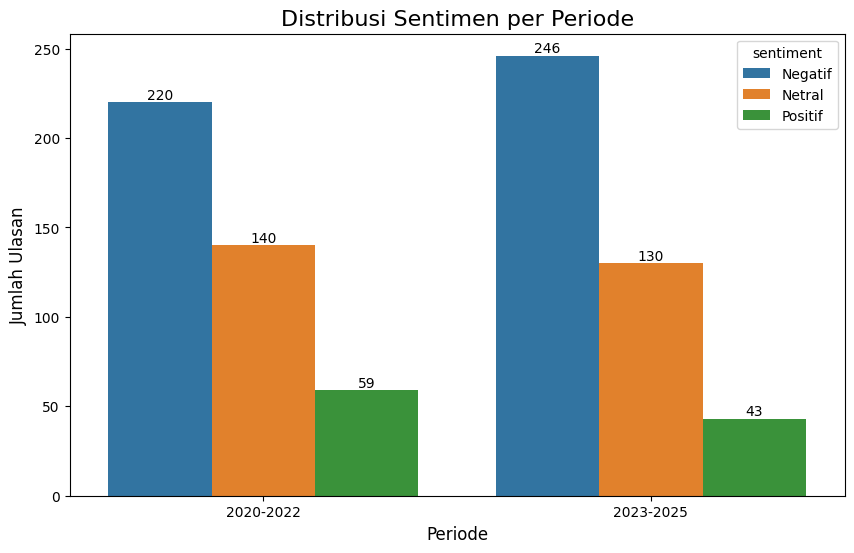

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan 'at' sudah datetime
df['at'] = pd.to_datetime(df['at'])
# Ekstrak tahun
df['year'] = df['at'].dt.year

# Definisikan periode/range
range1_start, range1_end = 2020, 2022
range2_start, range2_end = 2023, 2025

# Filter DataFrame untuk tiap range
df_range1 = df[(df['year'] >= range1_start) & (df['year'] <= range1_end)]
df_range2 = df[(df['year'] >= range2_start) & (df['year'] <= range2_end)]

# Group by sentiment untuk tiap range (multiclass)
sentiment_multi_range1 = df_range1['sentimen_multiclass'].value_counts().reset_index()
sentiment_multi_range1.columns = ['sentiment', 'count']
sentiment_multi_range1['range'] = f'{range1_start}-{range1_end}'

sentiment_multi_range2 = df_range2['sentimen_multiclass'].value_counts().reset_index()
sentiment_multi_range2.columns = ['sentiment', 'count']
sentiment_multi_range2['range'] = f'{range2_start}-{range2_end}'

# Combine multiclass sentiment data
combined_multi_sentiment = pd.concat([sentiment_multi_range1, sentiment_multi_range2])

# Plotting multiclass sentiment comparison
plt.figure(figsize=(10, 6))
ax_multi = sns.barplot(
    data=combined_multi_sentiment,
    x='range', y='count', hue='sentiment'
)
plt.title('Distribusi Sentimen per Periode', fontsize=16)
plt.xlabel('Periode', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

# Tambah label jumlah
for p in ax_multi.patches:
    height = p.get_height()
    # HANYA tambahkan label jika tinggi bar > 0
    if height > 0:
        ax_multi.annotate(f'{height:.0f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# TRAIN WITH SVM

# Data preparation

Split data menjadi training dan testing


In [8]:
from sklearn.model_selection import train_test_split

# Fitur
X = df['ulasan_bersih']

# Target Multiclass
y_multi = df['sentimen_multiclass']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print("\nMulticlass Sentiment Split:")
print(f"X_train_multi : {X_train_multi.shape}")
print(f"X_test_multi : {X_test_multi.shape}")
print(f"y_train_multi : {y_train_multi.shape}")
print(f"y_test_multi : {y_test_multi.shape}")


Multiclass Sentiment Split:
X_train_multi : (670,)
X_test_multi : (168,)
y_train_multi : (670,)
y_test_multi : (168,)


## Feature extraction


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Multiclass Sentiment ---
X_train_multi = X_train_multi.astype(str)
X_test_multi = X_test_multi.astype(str)

vectorizer_multi = TfidfVectorizer()
X_train_multi_tfidf = vectorizer_multi.fit_transform(X_train_multi)
X_test_multi_tfidf = vectorizer_multi.transform(X_test_multi)

print("\nTF-IDF Matrix Shapes (Multiclass):")
print(f"X_train_multi_tfidf : {X_train_multi_tfidf.shape}")
print(f"X_test_multi_tfidf : {X_test_multi_tfidf.shape}")


TF-IDF Matrix Shapes (Multiclass):
X_train_multi_tfidf : (670, 1368)
X_test_multi_tfidf : (168, 1368)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

ngram_ranges = [(1,1), (1,2), (1,3)]

for ngram in ngram_ranges:
    print("="*60)
    print(f"Testing n-gram range: {ngram}")
    print("="*60)

    vectorizer = TfidfVectorizer(ngram_range=ngram)
    X_train_vec = vectorizer.fit_transform(X_train_multi.astype(str))
    X_test_vec = vectorizer.transform(X_test_multi.astype(str))

    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_vec, y_train_multi)
    y_pred = model.predict(X_test_vec)

    print(classification_report(y_test_multi, y_pred, digits=4))
    print(f"Jumlah fitur TF-IDF: {len(vectorizer.get_feature_names_out())}")

Testing n-gram range: (1, 1)
              precision    recall  f1-score   support

     Negatif     0.6875    0.9462    0.7964        93
      Netral     0.7273    0.4444    0.5517        54
     Positif     0.8571    0.2857    0.4286        21

    accuracy                         0.7024       168
   macro avg     0.7573    0.5588    0.5922       168
weighted avg     0.7215    0.7024    0.6718       168

Jumlah fitur TF-IDF: 1368
Testing n-gram range: (1, 2)
              precision    recall  f1-score   support

     Negatif     0.6692    0.9570    0.7876        93
      Netral     0.7667    0.4259    0.5476        54
     Positif     0.8000    0.1905    0.3077        21

    accuracy                         0.6905       168
   macro avg     0.7453    0.5245    0.5476       168
weighted avg     0.7169    0.6905    0.6505       168

Jumlah fitur TF-IDF: 4879
Testing n-gram range: (1, 3)
              precision    recall  f1-score   support

     Negatif     0.6567    0.9462    0.7753 

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

ngrams = [(1,1), (1,2), (1,3)]
scores = []

# Drop rows where 'ulasan_bersih' is NaN or empty string
df_cleaned = df.dropna(subset=['ulasan_bersih'])
df_cleaned = df_cleaned[df_cleaned['ulasan_bersih'].str.strip() != '']


for ngram in ngrams:
    vectorizer = TfidfVectorizer(ngram_range=ngram)
    # Use the cleaned DataFrame for vectorization
    X_tfidf = vectorizer.fit_transform(df_cleaned['ulasan_bersih'])
    y = df_cleaned['sentimen_multiclass']

    model = LinearSVC(random_state=42)
    cv_score = cross_val_score(model, X_tfidf, y, cv=5, scoring='f1_macro')
    mean_score = np.mean(cv_score)
    scores.append((ngram, mean_score))

    print(f"N-gram range {ngram}: mean Macro F1 = {mean_score:.4f}")

# Rekomendasi best n-gram
best_ngram, best_score = max(scores, key=lambda x: x[1])
print("\nBest n-gram range:", best_ngram)
print("Macro F1-score terbaik:", best_score)

N-gram range (1, 1): mean Macro F1 = 0.6301
N-gram range (1, 2): mean Macro F1 = 0.5367
N-gram range (1, 3): mean Macro F1 = 0.4929

Best n-gram range: (1, 1)
Macro F1-score terbaik: 0.6300893262125178


In [12]:
# Pilih best n-gram
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Multiclass Sentiment ---
X_train_multi = X_train_multi.astype(str)
X_test_multi = X_test_multi.astype(str)

vectorizer_multi = TfidfVectorizer(ngram_range=(1,1))  # ganti sesuai hasil terbaik
X_train_multi_tfidf = vectorizer_multi.fit_transform(X_train_multi)
X_test_multi_tfidf = vectorizer_multi.transform(X_test_multi)

print("\nTF-IDF Matrix Shapes (Multiclass):")
print(f"X_train_multi_tfidf : {X_train_multi_tfidf.shape}")
print(f"X_test_multi_tfidf : {X_test_multi_tfidf.shape}")


TF-IDF Matrix Shapes (Multiclass):
X_train_multi_tfidf : (670, 1368)
X_test_multi_tfidf : (168, 1368)


## Model training


In [13]:
from sklearn.svm import SVC

# --- Multiclass Sentiment ---
svm_multi = SVC(kernel='linear', class_weight='balanced')
svm_multi.fit(X_train_multi_tfidf, y_train_multi)

print("Model SVM berhasil di train.")


Model SVM berhasil di train.


# Hyperparameter Tuning


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pandas as pd # Import pandas

# Drop rows where 'ulasan_bersih' is null or empty before splitting
df_filtered_for_tuning = df.dropna(subset=['ulasan_bersih'])
df_filtered_for_tuning = df_filtered_for_tuning[df_filtered_for_tuning['ulasan_bersih'].str.strip() != '']


# === 1. Data split ===
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered_for_tuning['ulasan_bersih'], # Use the filtered data
    df_filtered_for_tuning['sentimen_multiclass'], # Use the filtered data
    test_size=0.2,
    random_state=42
)

# === 2. Pipeline TF-IDF + SVM ===
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1))),
    ('svm', SVC())
])

# === 3. Parameter grid untuk tuning ===
param_grid = {
    'svm__C': [0.01, 0.1, 1, 100],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

# === 4. GridSearchCV ===
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=10,
    scoring='f1_macro', # Changed scoring to f1_macro as used in cross-validation
    n_jobs=-1,
    verbose=2
)

# === 5. Fit hanya ke data train ===
grid.fit(X_train, y_train)

# === 6. Cek hasil ===
print("Best parameters:", grid.best_params_)
print("Best cross-val f1_macro:", grid.best_score_) # Updated print statement

# === 7. Evaluate di test set ===
best_model = grid.best_estimator_
test_f1_macro = best_model.score(X_test, y_test) # Using score here might be accuracy, clarify or use f1_macro metric explicitly
print("Test Accuracy:", test_f1_macro) # Keep as Accuracy for simplicity or calculate f1_macro explicitly

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters: {'svm__C': 100, 'svm__kernel': 'linear'}
Best cross-val f1_macro: 0.6597362755445614
Test Accuracy: 0.7421383647798742


=== Classification Report ===
              precision    recall  f1-score   support

     Negatif       0.90      0.80      0.85       105
      Netral       0.54      0.71      0.61        42
     Positif       0.40      0.33      0.36        12

    accuracy                           0.74       159
   macro avg       0.61      0.62      0.61       159
weighted avg       0.77      0.74      0.75       159



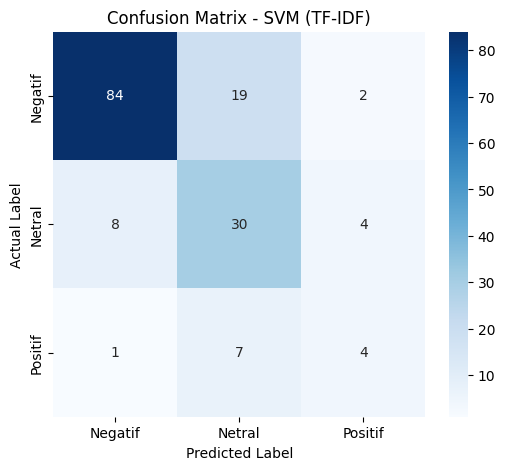

<Figure size 800x500 with 0 Axes>

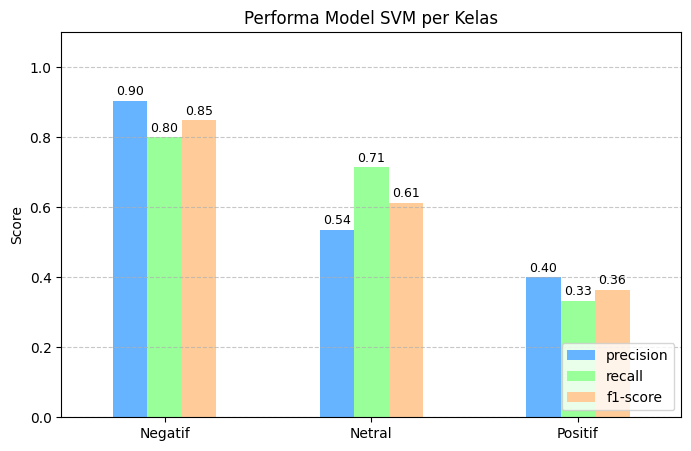

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Daftar label sentimen sesuai urutan target
label_names = ['Negatif', 'Netral', 'Positif']

# Prediksi pada data test
y_pred = best_model.predict(X_test)

# Classification Report (dalam bentuk dict supaya bisa diolah)
report = classification_report(y_test, y_pred, target_names=label_names, output_dict=True)

# Cetak classification report lengkap
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - SVM (TF-IDF)')
plt.show()

# Buat DataFrame dari classification report
report_df = pd.DataFrame(report).transpose().iloc[:-3, :]  # Hapus avg rows

# === Bar Chart Performa per Kelas ===
plt.figure(figsize=(8, 5))
ax = report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5), color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Performa Model SVM per Kelas')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(range(len(report_df.index)), report_df.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')

# Tambahkan label angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=2)

plt.show()

Simpan dan gunakan model

In [16]:
import joblib

# Save the entire pipeline
joblib.dump(best_model, '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/svm_pipeline_play.pkl')

# joblib.dump(vectorizer, '/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/tfidf_vectorizer_play.pkl')

['/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/svm_pipeline_play.pkl']

In [17]:
# Load buat prediksi baru
# loaded_model = joblib.load('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/svm_best_model_play.pkl')
# loaded_vectorizer = joblib.load('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/tfidf_vectorizer_play.pkl')

# Load the entire pipeline
loaded_pipeline = joblib.load('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/svm_pipeline_play.pkl')

sample = ["Saya tidak bisa nonton"]
# Use the loaded pipeline directly for prediction
print(loaded_pipeline.predict(sample))

['Netral']


## Prediction

In [18]:
# --- Multiclass Sentiment Predictions ---
y_pred_multi = svm_multi.predict(X_test_multi_tfidf)

print("\nFirst 10 Multiclass Predictions:")
print(y_pred_multi[:10])


First 10 Multiclass Predictions:
['Positif' 'Netral' 'Negatif' 'Negatif' 'Netral' 'Negatif' 'Negatif'
 'Netral' 'Positif' 'Netral']


In [19]:
# Buat dataframe test
df_test_tfidf_play = X_test_multi.to_frame()  # ubah Series jadi DataFrame
df_test_tfidf_play['Sentimen_multiclass'] = y_test_multi.values
df_test_tfidf_play['predicted_sentiment_tfidf'] = y_pred_multi

df_test_tfidf_play.to_csv('/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/df_test_tfidf_play.csv', index=False)

distribution = df_test_tfidf_play['predicted_sentiment_tfidf'].value_counts(normalize=True) * 100
print(distribution)

predicted_sentiment_tfidf
Negatif    58.333333
Netral     30.357143
Positif    11.309524
Name: proportion, dtype: float64


In [20]:
df_test_tfidf_play.head()

,ulasan_bersih,Sentimen_multiclass,predicted_sentiment_tfidf
72,disneyhotstar,Netral,Positif
548,,Netral,Netral
358,nonton layar gk kek ngecrash warna hijau hijau kayak tinta bocor oke nonton laptop eh pindah laptop gk login bener login india breenegsek loh pusing mikirin bayat tahun sial,Negatif,Negatif
455,aplikasi bug parah gin sih langsung bikin hp mati bahaya bener,Negatif,Negatif
318,drama mistresses tonton tibatiba lg hotstar muncul langgan krn nonton drama,Negatif,Netral


predicted_sentiment_tfidf
Negatif    58.333333
Netral     30.357143
Positif    11.309524
Name: count, dtype: float64


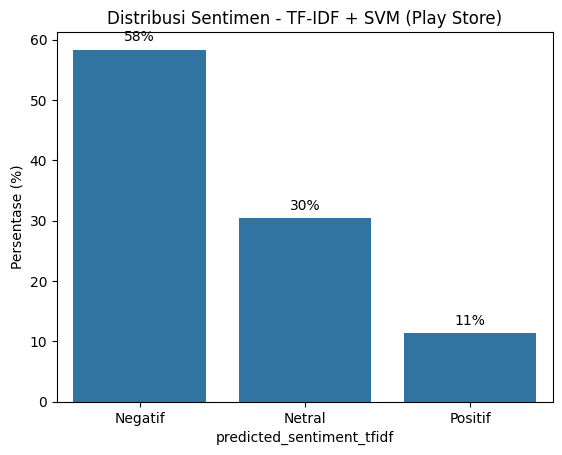

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung distribusi
dist_tfidf_play = df_test_tfidf_play['predicted_sentiment_tfidf'].value_counts()
dist_tfidf_play_percent = dist_tfidf_play / dist_tfidf_play.sum() * 100
print(dist_tfidf_play_percent)

# Buat barplot
sns.barplot(x=dist_tfidf_play_percent.index, y=dist_tfidf_play_percent.values)
plt.ylabel("Persentase (%)")
plt.title("Distribusi Sentimen - TF-IDF + SVM (Play Store)")

# Tambahkan label jumlah di atas tiap bar
for i, value in enumerate(dist_tfidf_play_percent.values):
    plt.text(i, value + 1, f"{round(value)}%", ha='center', va='bottom')  # dibulatkan ke integer

plt.show()

# IndoBERT


# Install & Import Library

In [22]:
!pip install transformers torch scikit-learn pandas tqdm

In [23]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [24]:
#Back to Checkpoint

# Baca kembali file CSV
df = pd.read_csv("/content/drive/MyDrive/Tesis/SCRAPE SENTIMENT/lex_labeled_review_play.csv")

# Tampilkan beberapa baris awal untuk cek isi
print(df.head())
#display(df.head())

                                                                     content  \
0            Please fix the "WiFi bug" , i couldn't open the app on any wifi   
1              Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2  Rada kesel pengen nonton, udah coba buat bayar yg perbulan tapi gak bisa"   
3                                                                      Hebat   
4                                                       Ga bisa" mutar video   

   score                   at  \
0      2  2022-12-31 20:28:17   
1      4  2022-12-31 18:09:19   
2      3  2022-12-31 15:23:16   
3      5  2022-12-31 12:50:14   
4      1  2022-12-31 11:58:09   

                                                              translated_content  \
0  Tolong perbaiki "bug WiFi", saya tidak bisa membuka aplikasi di wifi mana pun   
1                  Lumayanlah alternatif hiburan Gratis otomatis, krn pake HALO.   
2      Rada kesel pengen nonton, udah coba buat bayar yg perbulan ta

In [25]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import torch
import os

# === 1. Load model IndoBERT ===
MODEL_NAME = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# === 2. Function untuk generate dan cache IndoBERT embeddings ===
def get_bert_embeddings(texts, cache_path="indobert_embeddings.npy"):
    if os.path.exists(cache_path):
        print(f"🔹 Loading cached embeddings from {cache_path}")
        return np.load(cache_path)

    print("Generating IndoBERT embeddings...")
    all_embeddings = []

    # Ensure texts is a list of strings
    if isinstance(texts, pd.Series):
        texts = texts.tolist()
    elif not isinstance(texts, list):
         raise ValueError("Input to get_bert_embeddings must be a pandas Series or a list of strings.")


    for i, text in enumerate(texts):
        # Ensure each element is a string
        if not isinstance(text, str):
            text = str(text)

        inputs = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=128
        )
        with torch.no_grad():
            outputs = model(**inputs)
        mean_emb = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        all_embeddings.append(mean_emb)

        if (i + 1) % 100 == 0:
            print(f"  Processed {i+1}/{len(texts)} texts")

    embeddings = np.array(all_embeddings)
    np.save(cache_path, embeddings)
    print(f"Saved embeddings to {cache_path}")
    return embeddings


# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    df['ulasan_bersih'],
    df['sentimen_multiclass'],
    test_size=0.2,
    random_state=42
)

# === 4. Generate embeddings IndoBERT (cache otomatis) ===
# Convert Series to list of strings for embedding generation
train_embeddings = get_bert_embeddings(X_train.tolist(), cache_path="train_indobert.npy")
test_embeddings = get_bert_embeddings(X_test.tolist(), cache_path="test_indobert.npy")

# === 5. Hyperparameter tuning untuk SVM ===
param_grid = {
    'C': [0.01, 0.1, 1, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)

grid.fit(train_embeddings, y_train)

print("\nBest parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

# === 6. Evaluate model terbaik di test set ===
best_svm = grid.best_estimator_
y_pred = best_svm.predict(test_embeddings)

print("\n=== Evaluation on Test Set ===")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# === 7. Simpan hasil prediksi ke DataFrame ===
df_result = X_test.to_frame()
df_result['sentimen_multiclass'] = y_test.values
df_result['predicted_sentiment_bert'] = y_pred
print("\nContoh hasil prediksi:")
print(df_result.head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Generating IndoBERT embeddings...
  Processed 100/670 texts
  Processed 200/670 texts
  Processed 300/670 texts
  Processed 400/670 texts
  Processed 500/670 texts
  Processed 600/670 texts
Saved embeddings to train_indobert.npy
Generating IndoBERT embeddings...
  Processed 100/168 texts
Saved embeddings to test_indobert.npy
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Best parameters: {'C': 100, 'kernel': 'rbf'}
Best cross-val accuracy: 0.6160765885375209

=== Evaluation on Test Set ===
Test Accuracy: 0.7380952380952381

Classification Report:
              precision    recall  f1-score   support

     Negatif      0.737     0.926     0.821        94
      Netral      0.818     0.581     0.679        62
     Positif      0.167     0.083     0.111        12

    accuracy                          0.738       168
   macro avg      0.574     0.530     0.537       168
weighted avg      0.726     0.738     0.718       168


Contoh hasil prediksi:
                         

=== Classification Report (IndoBERT + SVM Tuned) ===
              precision    recall  f1-score   support

     Negatif       0.74      0.93      0.82        94
      Netral       0.82      0.58      0.68        62
     Positif       0.17      0.08      0.11        12

    accuracy                           0.74       168
   macro avg       0.57      0.53      0.54       168
weighted avg       0.73      0.74      0.72       168



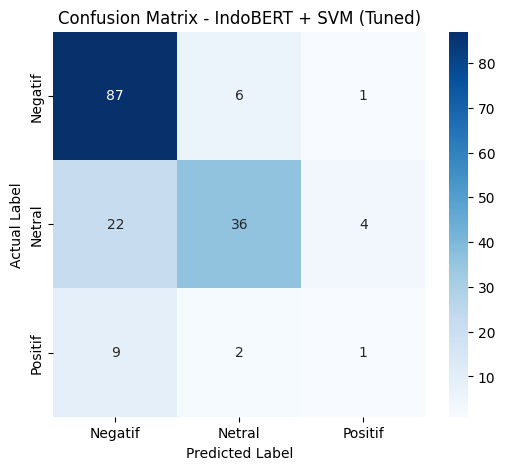

<Figure size 800x500 with 0 Axes>

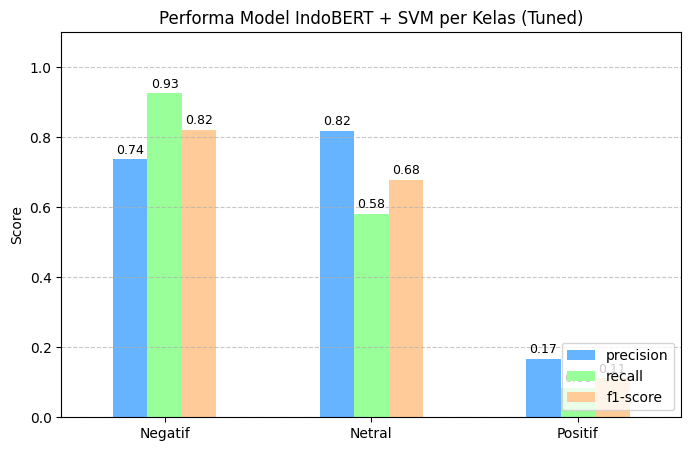

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Daftar label sentimen sesuai urutan target
label_names = ['Negatif', 'Netral', 'Positif']

# Prediksi pada data test (menggunakan hasil dari IndoBERT SVM tuning)
# Make sure y_test and y_pred_bert_tuned are available from the previous cell
y_pred_bert_tuned = y_pred # Use the predictions from the IndoBERT model

# Classification Report (dalam bentuk dict supaya bisa diolah)
report = classification_report(y_test, y_pred_bert_tuned, target_names=label_names, output_dict=True)

# Cetak classification report lengkap
print("=== Classification Report (IndoBERT + SVM Tuned) ===")
print(classification_report(y_test, y_pred_bert_tuned, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_bert_tuned, labels=label_names) # Use label_names for consistent order
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - IndoBERT + SVM (Tuned)')
plt.show()

# Buat DataFrame dari classification report
report_df = pd.DataFrame(report).transpose().iloc[:-3, :]  # Hapus avg rows

# === Bar Chart Performa per Kelas ===
plt.figure(figsize=(8, 5))
ax = report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5), color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Performa Model IndoBERT + SVM per Kelas (Tuned)')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(range(len(report_df.index)), report_df.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')

# Tambahkan label angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=2)

plt.show()

Distribution of Predicted Sentiment (IndoBERT + SVM Tuned):
predicted_sentiment_bert
Negatif    70.238095
Netral     26.190476
Positif     3.571429
Name: count, dtype: float64


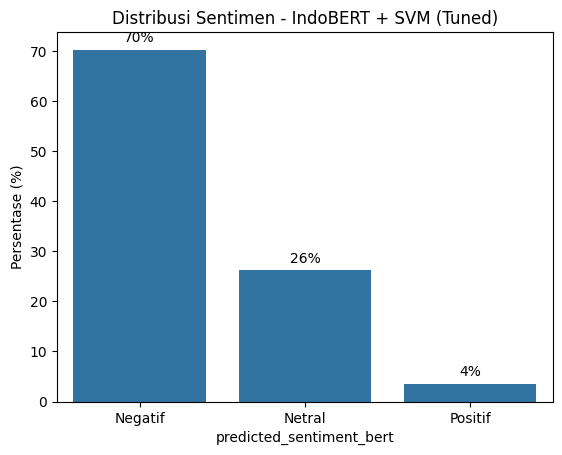

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung distribusi predicted sentiment dari df_result (hasil dari IndoBERT tuning)
# Make sure df_result is available from cell 19XsYiYy6d6k
dist_bert_tuned = df_result['predicted_sentiment_bert'].value_counts()
dist_bert_tuned_percent = dist_bert_tuned / dist_bert_tuned.sum() * 100
print("Distribution of Predicted Sentiment (IndoBERT + SVM Tuned):")
print(dist_bert_tuned_percent)

# Buat barplot
sns.barplot(x=dist_bert_tuned_percent.index, y=dist_bert_tuned_percent.values)
plt.ylabel("Persentase (%)")
plt.title("Distribusi Sentimen - IndoBERT + SVM (Tuned)")

# Tambahkan label jumlah di atas tiap bar
for i, value in enumerate(dist_bert_tuned_percent.values):
    plt.text(i, value + 1, f"{round(value)}%", ha='center', va='bottom')  # dibulatkan ke integer

plt.show()

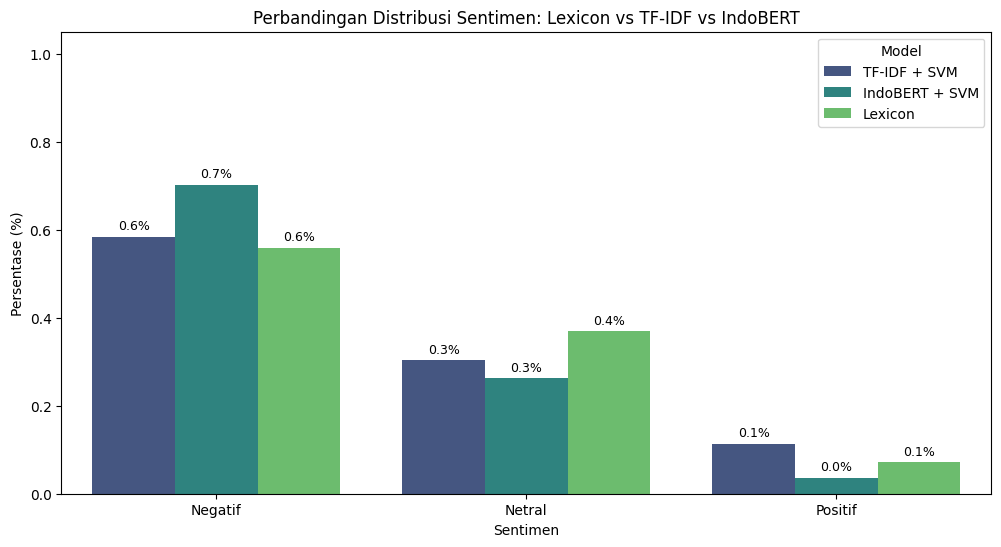

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_test_tfidf_play and df_result DataFrames are available
# df_test_tfidf_play contains 'predicted_sentiment_tfidf' and 'Sentimen_multiclass'
# df_result contains 'predicted_sentiment_bert'

# Calculate percentage distributions for TF-IDF + SVM predictions
dist_tfidf_percent = df_test_tfidf_play['predicted_sentiment_tfidf'].value_counts(normalize=True).reset_index()
dist_tfidf_percent.columns = ['Sentimen', 'Persentase']
dist_tfidf_percent['Model'] = 'TF-IDF + SVM'

# Calculate percentage distributions for IndoBERT + SVM predictions
dist_bert_percent = df_result['predicted_sentiment_bert'].value_counts(normalize=True).reset_index()
dist_bert_percent.columns = ['Sentimen', 'Persentase']
dist_bert_percent['Model'] = 'IndoBERT + SVM'

# Calculate percentage distributions for the original sentiment_multiclass in the test set
# We can use the y_test from the last split which is still available in the environment
dist_original_percent = y_test.value_counts(normalize=True).reset_index()
dist_original_percent.columns = ['Sentimen', 'Persentase']
dist_original_percent['Model'] = 'Lexicon'


# Combine the dataframes for plotting
combined_dist = pd.concat([dist_tfidf_percent, dist_bert_percent, dist_original_percent])

# Order the sentiment categories for consistent plotting
sentiment_order = ['Negatif', 'Netral', 'Positif']
combined_dist['Sentimen'] = pd.Categorical(combined_dist['Sentimen'], categories=sentiment_order, ordered=True)
combined_dist = combined_dist.sort_values('Sentimen')


# Create the grouped barplot
plt.figure(figsize=(12, 6)) # Increase figure size to accommodate more bars
ax = sns.barplot(data=combined_dist, x='Sentimen', y='Persentase', hue='Model', palette='viridis')

plt.ylabel("Persentase (%)")
plt.title("Perbandingan Distribusi Sentimen: Lexicon vs TF-IDF vs IndoBERT")
plt.ylim(0, 1.05) # Set y-axis limit slightly above 100% for labels

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)


plt.show()

In [29]:
# Export discovered GridSearchCV results and basic evaluation to JSON (Playstore)
import json
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

results = {}

def _serialize(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    try:
        import pandas as _pd
        if isinstance(obj, _pd.Series) or isinstance(obj, _pd.DataFrame):
            return obj.to_dict()
    except Exception:
        pass
    try:
        return obj.tolist()
    except Exception:
        return obj

for name, obj in list(globals().items()):
    try:
        if isinstance(obj, GridSearchCV):
            entry = {}
            entry['best_score'] = float(getattr(obj, 'best_score_', getattr(obj, 'best_score', None))) if getattr(obj, 'best_score_', None) is not None or getattr(obj, 'best_score', None) is not None else None
            entry['best_params'] = getattr(obj, 'best_params_', getattr(obj, 'best_params', None))
            try:
                cv = getattr(obj, 'cv_results_', None)
                if cv is not None:
                    entry['cv_results'] = {k: _serialize(v) for k, v in cv.items()}
            except Exception:
                pass
            results[name] = entry
    except Exception:
        continue

if 'X_test' in globals() and 'y_test' in globals():
    try:
        X_test_local = X_test
        y_test_local = y_test
        for name, obj in list(globals().items()):
            try:
                if isinstance(obj, GridSearchCV):
                    best = getattr(obj, 'best_estimator_', None) or obj.best_estimator_
                    if best is not None:
                        y_pred = best.predict(X_test_local)
                        rep = classification_report(y_test_local, y_pred, output_dict=True, zero_division=0)
                        cm = confusion_matrix(y_test_local, y_pred).tolist()
                        results[name].update({'classification_report': rep, 'confusion_matrix': cm, 'labels': sorted(list(set(y_test_local)))})
            except Exception:
                continue
    except Exception:
        pass

out_path = 'exported_model_results_play.json'
with open(out_path, 'w', encoding='utf-8') as fh:
    json.dump(results, fh, ensure_ascii=False, indent=2)

print(f'Wrote {out_path} with keys: {list(results.keys())}')

Wrote exported_model_results_play.json with keys: ['grid']


In [30]:
# Copy exported JSONs to Google Drive and trigger browser download (run after export cell)
from pathlib import Path
import shutil
try:
    from google.colab import drive as _drive
    from google.colab import files as _files
except Exception:
    _drive = None
    _files = None

out_files = ["exported_model_results_app.json", "exported_model_results_play.json"]
drive_dest_folder = "/content/drive/MyDrive/Tesis"  # change if needed

def ensure_drive_mounted():
    if _drive is None:
        print("google.colab not available in this environment. Skipping Drive copy and download.")
        return False
    if not Path("/content/drive").exists():
        print("Mounting Google Drive...")
        _drive.mount("/content/drive", force_remount=True)
    return True

def copy_and_offer_download(fname, drive_folder):
    src = Path(fname)
    if not src.exists():
        print(f"NOT FOUND: {fname} (skipping)")
        return
    dst_folder = Path(drive_folder)
    dst_folder.mkdir(parents=True, exist_ok=True)
    dst = dst_folder / src.name
    shutil.copy2(src, dst)
    print(f"Copied {src} -> {dst}")
    if _files is not None:
        try:
            print(f"Triggering browser download for {src.name} ...")
            _files.download(str(src))
        except Exception as e:
            print(f"files.download failed: {e}. You can find the file at {dst} in Drive.")

drive_ready = ensure_drive_mounted()
for f in out_files:
    copy_and_offer_download(f, drive_dest_folder)

print("Done. If you changed the drive_dest_folder ensure it exists and is correct.")

NOT FOUND: exported_model_results_app.json (skipping)
Copied exported_model_results_play.json -> /content/drive/MyDrive/Tesis/exported_model_results_play.json
Triggering browser download for exported_model_results_play.json ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Done. If you changed the drive_dest_folder ensure it exists and is correct.
